In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import regularizers

In [2]:
image_size = (256,256)
batch_size = 16

In [3]:
from keras.preprocessing.image import ImageDataGenerator
#creating a data generator for training and validation.
train_gen =  ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
train_ds = train_gen.flow_from_directory(
    r"D:\Dataset\clothing-dataset-small-master\train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

validation_gen = ImageDataGenerator(rescale=1./255, horizontal_flip = True)
val_ds = train_gen.flow_from_directory(
    r"D:\Dataset\clothing-dataset-small-master\validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer = regularizers.l2(l=0.01)))
model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer = regularizers.l2(l=0.01)))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [8]:
history = model.fit(train_ds, steps_per_epoch = len(train_ds)//batch_size, epochs=500, validation_data=val_ds, validation_steps=len(val_ds)//batch_size)

Epoch 1/500
12/12 [==============================] - 6s 433ms/step - loss: 11.2065 - accuracy: 0.2812 - val_loss: 10.4526 - val_accuracy: 0.0625
Epoch 2/500
12/12 [==============================] - 5s 418ms/step - loss: 9.4918 - accuracy: 0.2708 - val_loss: 8.9715 - val_accuracy: 0.3125
Epoch 3/500
12/12 [==============================] - 5s 409ms/step - loss: 8.3983 - accuracy: 0.2812 - val_loss: 7.6587 - val_accuracy: 0.2500
Epoch 4/500
12/12 [==============================] - 5s 413ms/step - loss: 7.4542 - accuracy: 0.2812 - val_loss: 7.3417 - val_accuracy: 0.0625
Epoch 5/500
12/12 [==============================] - 5s 411ms/step - loss: 6.5881 - accuracy: 0.3333 - val_loss: 6.1591 - val_accuracy: 0.3750
Epoch 6/500
12/12 [==============================] - 5s 411ms/step - loss: 5.9191 - accuracy: 0.3229 - val_loss: 5.8343 - val_accuracy: 0.3750
Epoch 7/500
12/12 [==============================] - 5s 416ms/step - loss: 5.4132 - accuracy: 0.3125 - val_loss: 5.0568 - val_accuracy: 0.31

In [5]:
model.save('Clothes_Detection.h5')

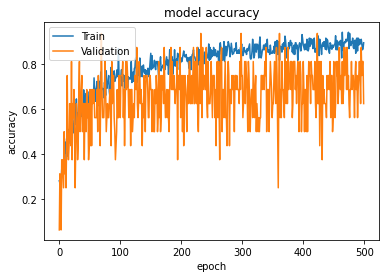

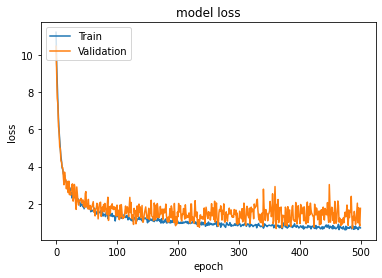

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [5]:
#creating a data generator for testing and validation.
test_gen =  ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
test_ds = test_gen.flow_from_directory(
    r"D:\Dataset\clothing-dataset-small-master\test",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 372 images belonging to 10 classes.


In [6]:
history1 = model.fit(train_ds, steps_per_epoch = len(train_ds)//batch_size, epochs=500, validation_data=test_ds, validation_steps=len(test_ds)//batch_size)

Epoch 1/500
12/12 [==============================] - 6s 424ms/step - loss: 11.3667 - accuracy: 0.1968 - val_loss: 10.5010 - val_accuracy: 0.2500
Epoch 2/500
12/12 [==============================] - 5s 422ms/step - loss: 9.9099 - accuracy: 0.2448 - val_loss: 9.7337 - val_accuracy: 0.1250
Epoch 3/500
12/12 [==============================] - 5s 432ms/step - loss: 8.6885 - accuracy: 0.3021 - val_loss: 8.2993 - val_accuracy: 0.1875
Epoch 4/500
12/12 [==============================] - 5s 450ms/step - loss: 7.8216 - accuracy: 0.2865 - val_loss: 7.4450 - val_accuracy: 0.1875
Epoch 5/500
12/12 [==============================] - 5s 433ms/step - loss: 6.9601 - accuracy: 0.2865 - val_loss: 6.8622 - val_accuracy: 0.1250
Epoch 6/500
12/12 [==============================] - 5s 429ms/step - loss: 6.3183 - accuracy: 0.3073 - val_loss: 6.0074 - val_accuracy: 0.3750
Epoch 7/500
12/12 [==============================] - 5s 436ms/step - loss: 5.7705 - accuracy: 0.3281 - val_loss: 5.8413 - val_accuracy: 0.18

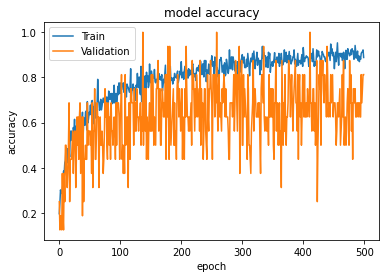

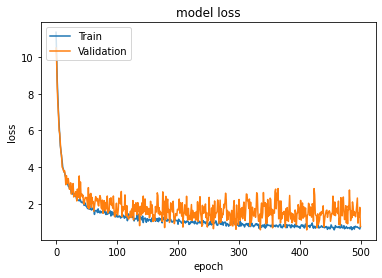

In [7]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
color_train_gen =  ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
color_train_ds = color_train_gen.flow_from_directory(
    r"D:\Dataset\clothing-dataset-small-master\color_train",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 1929 images belonging to 7 classes.


In [9]:
color_test_gen =  ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
color_test_ds = color_test_gen.flow_from_directory(
    r"D:\Dataset\clothing-dataset-small-master\color_test",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 464 images belonging to 7 classes.


In [6]:
model_color = tf.keras.models.Sequential()
model_color.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_color.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_color.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_color.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_color.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_color.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_color.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model_color.add(tf.keras.layers.MaxPooling2D((2, 2)))
model_color.add(tf.keras.layers.Flatten())
model_color.add(tf.keras.layers.Dropout(0.5))
model_color.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer = regularizers.l2(l=0.01)))
model_color.add(tf.keras.layers.Dense(7, activation='softmax', kernel_regularizer = regularizers.l2(l=0.01)))
model_color.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), metrics=['accuracy'])

In [11]:
history3 = model_color.fit(color_train_ds, steps_per_epoch = len(color_train_ds)//batch_size, epochs=500, validation_data=color_test_ds, validation_steps=len(color_test_ds)//batch_size)

Epoch 1/500
7/7 [==============================] - 4s 486ms/step - loss: 11.0661 - accuracy: 0.3036 - val_loss: 10.2223 - val_accuracy: 0.3750
Epoch 2/500
7/7 [==============================] - 3s 431ms/step - loss: 9.8993 - accuracy: 0.4286 - val_loss: 9.1919 - val_accuracy: 0.5000
Epoch 3/500
7/7 [==============================] - 3s 387ms/step - loss: 8.8352 - accuracy: 0.6095 - val_loss: 8.7808 - val_accuracy: 0.5000
Epoch 4/500
7/7 [==============================] - 3s 401ms/step - loss: 8.2270 - accuracy: 0.5179 - val_loss: 7.8560 - val_accuracy: 0.4375
Epoch 5/500
7/7 [==============================] - 3s 401ms/step - loss: 7.6293 - accuracy: 0.5446 - val_loss: 7.4056 - val_accuracy: 0.4375
Epoch 6/500
7/7 [==============================] - 3s 402ms/step - loss: 6.9362 - accuracy: 0.6696 - val_loss: 6.6202 - val_accuracy: 0.6875
Epoch 7/500
7/7 [==============================] - 3s 435ms/step - loss: 6.4236 - accuracy: 0.7321 - val_loss: 6.2613 - val_accuracy: 0.7500
Epoch 8/500

In [7]:
model_color.save('color_detection.h5')

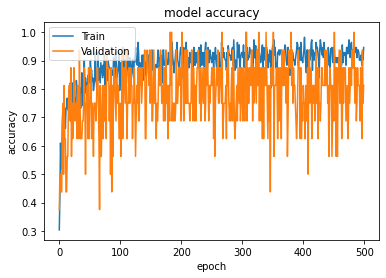

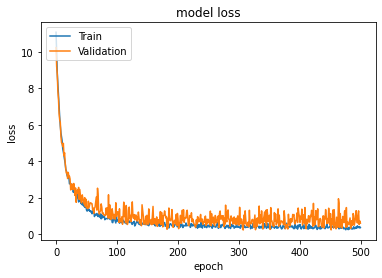

In [12]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
#checking the model
from keras.preprocessing import image
model = tf.keras.models.load_model('Clothes_Detection.h5')
path = 'tshirt.jpg' 
img = tf.keras.utils.load_img(path, target_size=(256,256))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

imagea = np.vstack([x])
classes = model.predict(imagea)
print(classes)

1/1 [==============================] - 0s 98ms/step
[[9.9789435e-01 2.1056321e-03 5.3197709e-15 4.7570196e-23 8.2363627e-14
  2.1751190e-09 9.7559833e-20 3.2666370e-12 4.5003235e-13 1.1977313e-15]]


In [37]:
arr = np.array(classes)
indices = classes[:, 0].astype(int)
for i in arr:
    print(i)

[9.9983168e-01 1.6797447e-04 5.5790360e-16 2.3947397e-24 7.2676064e-18
 2.8623398e-07 1.1778952e-17 6.5226558e-08 2.3353802e-11 8.6430134e-11]


In [12]:
#checking the model
from keras.preprocessing import image
model = tf.keras.models.load_model('color_detection.h5')
path = 'jeans.jpg' 
img = tf.keras.utils.load_img(path, target_size=(256,256))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

imagea = np.vstack([x])
classes = model.predict(imagea)
print(classes)

1/1 [==============================] - 0s 55ms/step
[[1.1254649e-25 3.4829506e-04 4.5567231e-05 2.0375477e-19 3.0086231e-09
  7.9027934e-18 9.9960619e-01]]
